# **MLOps with Pycaret and MLflow**



**Integrating PyCaret and MLflow in MLOps**

By combining **PyCaret** and **MLflow** in an MLOps workflow, we can:

- **Simplify Model Building**: Use PyCaret to automate model creation, selection, and evaluation.
- **Track Experiments and Models**: Use MLflow to log and manage models, parameters, and metrics, ensuring that every step is tracked and reproducible.




#### **Upgrade PyCaret and MLflow**  

To ensure you have the latest versions of **PyCaret** and **MLflow**



In [ ]:
pip install --upgrade pycaret mlflow


Note: you may need to restart the kernel to use updated packages.


# **Initialize PyCaret for Diamond Price Prediction**  

This Code **loads the "diamond" dataset, handles missing values, and initializes PyCaret for automated machine learning**. It ensures that the target column (`Price`) exists before setting up PyCaret with transformations. Finally, it confirms the setup completion, preparing the dataset for model training and evaluation.  


In [ ]:
# Import necessary functions from pycaret
from pycaret.regression import setup, compare_models, plot_model, finalize_model, save_model

# Load the 'diamond' dataset from PyCaret's built-in datasets
from pycaret.datasets import get_data
data = get_data('diamond')

# Ensure no missing values in the dataset for numerical columns
numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Ensure that 'Price' column exists and run the setup
if 'Price' not in data.columns:
    raise ValueError("'Price' column not found in the dataset")

# Initialize PyCaret setup
experiment_name = 'diamond_experiment_01'
s = setup(data,
          target='Price',
          transform_target=True,
          log_experiment=False,  # Temporarily disable logging
          experiment_name=experiment_name)

# Check if setup was successful
print(f"Experiment '{experiment_name}' setup complete!")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


,Description,Value
0,Session id,3073
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


Experiment 'diamond_experiment_01' setup complete!


## **Initialize PyCaret Setup**  

This step **initializes PyCaret** to set up an automated machine learning environment for model training and evaluation.  

##### **Define the Experiment Name**
The experiment is given a unique name to track its progress.  

In [ ]:
# Initialize PyCaret setup
experiment_name = 'diamond_experiment_01'
s = setup(data,
          target='Price',
          transform_target=True,
          log_experiment=False,  # Temporarily disable logging
          experiment_name=experiment_name)

,Description,Value
0,Session id,1309
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


## **Compare All Models**  

This step **evaluates multiple machine learning models** and selects the best one for predicting the target variable (`Price`).  

---

##### **Compare Multiple Models**  
The **`compare_models()`** function in PyCaret ranks models based on their performance.  


In [ ]:
# Now compare models (only after setup completes successfully)
best = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,733.0732,2139370.2262,1440.3093,0.9806,0.0783,0.0579,0.6760
lightgbm,Light Gradient Boosting Machine,654.7141,2126885.7240,1426.9999,0.9805,0.0679,0.0494,0.3160
rf,Random Forest Regressor,732.1974,2241482.2832,1464.8070,0.9797,0.0773,0.0571,0.5310
gbr,Gradient Boosting Regressor,773.9633,2895420.4529,1658.2494,0.9731,0.0777,0.0576,0.2860
dt,Decision Tree Regressor,920.1227,3474161.5954,1839.3315,0.9685,0.1005,0.0732,0.1060
ada,AdaBoost Regressor,2067.0855,17991573.4799,4203.3031,0.8371,0.1894,0.1546,0.2310
knn,K Neighbors Regressor,3127.2883,37870619.3805,6127.5393,0.6528,0.3659,0.2343,0.1270
omp,Orthogonal Matching Pursuit,3471.3174,96889055.9644,9558.7030,0.0913,0.2884,0.2263,0.1020
llar,Lasso Least Angle Regression,6719.2127,122722128.5755,11063.7587,-0.1279,0.7245,0.5708,0.1120
lasso,Lasso Regression,6719.2127,122722128.5755,11063.7587,-0.1279,0.7245,0.5708,0.1100


## **Visualizing Residuals of the Best Model**  

This step **generates a residual plot** to evaluate the model’s performance using PyCaret’s `plot_model()` function.  

---

### **1️⃣ Generate the Residual Plot**  
The `plot_model()` function is used to **visualize residuals** of the best-trained model.  

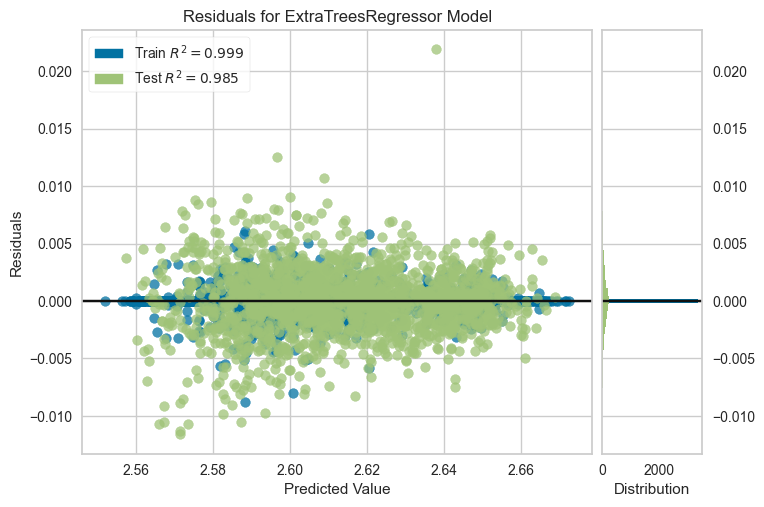

In [ ]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

### **Check Feature Importance**
This step visualizes the feature importance of the best-trained model using the plot_model() function in PyCaret. By specifying the plot type as 'feature', it generates a feature importance plot, which helps in understanding which features (variables) contribute the most to the model’s predictions.

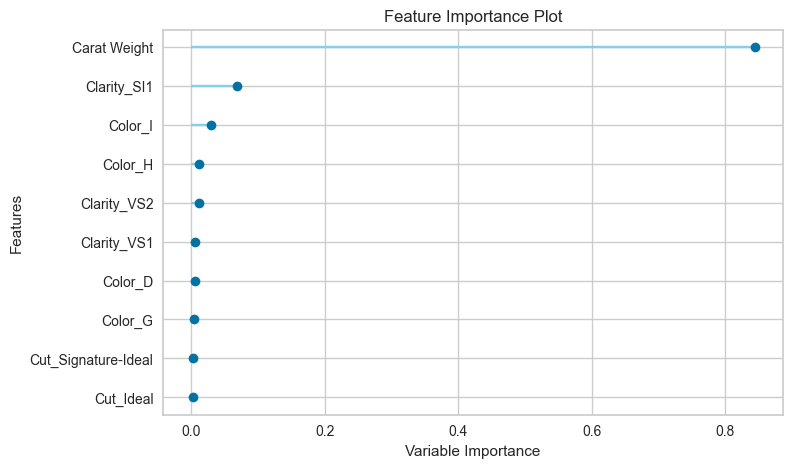

In [ ]:
# check feature importance
plot_model(best, plot = 'feature')

## **Finalize the Model and Save It**  

This step **finalizes the best-performing model** and **saves it to disk** for future use.  

In [ ]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                        

### Model management with MLFlow

## **Run MLflow UI within Command Prompt**  

This step **launches the MLflow UI** to visualize and manage machine learning experiments.  

---

### **1️⃣ Start the MLflow Tracking Server**  
To start the MLflow UI, open the **Command Prompt (CMD)** or **Terminal** and run:  

```bash
mlflow ui



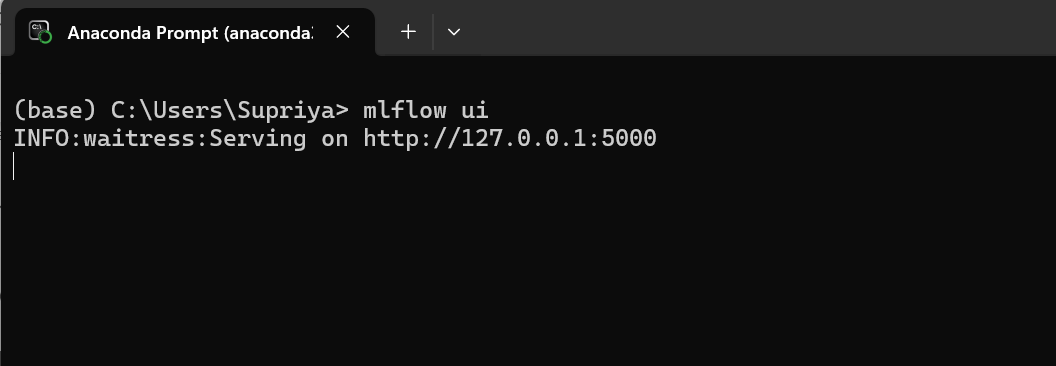

In [1]:
#localhost:5000

## **Block 1 - Imports and Setup**  

This block **imports the required libraries** and sets up MLflow for experiment tracking.


In [ ]:
# Block 1 - Imports and Setup
import mlflow
import mlflow.sklearn
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
import os

mlflow.set_tracking_uri("http://localhost:5000")

## **Load and Predict with the Saved MLflow Model**  

This section explains how to **load a trained model** from MLflow and use it for making predictions.  


In [ ]:
# Block 2 - Load Data
data = get_data('diamond')

numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


## **Block 3 - Training Code**

This block **trains a machine learning model** using PyCaret and tracks the experiment with MLflow.


In [ ]:
# Block 3 - Training Code
s = setup(data=data,
         target='Price',
         transform_target=True,
         log_experiment=False)

experiment_name = "diamond_price_prediction"
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

model_dir = "./saved_models"
os.makedirs(model_dir, exist_ok=True)

with mlflow.start_run(experiment_id=experiment_id) as run:
    best_model = compare_models()

    mlflow.log_param("model_type", type(best_model).__name__)

    residuals_plot = plot_model(best_model, plot='residuals', save=True)
    feature_plot = plot_model(best_model, plot='feature', save=True)

    if os.path.exists('Residuals.png'):
        mlflow.log_artifact('Residuals.png')
    if os.path.exists('Feature Importance.png'):
        mlflow.log_artifact('Feature Importance.png')

    final_model = finalize_model(best_model)
    model_path = os.path.join(model_dir, 'diamond-pipeline')
    save_model(final_model, model_path)

    mlflow.sklearn.log_model(final_model, "model")

    run_id = run.info.run_id
    print(f"Model training completed. Run ID: {run_id}")

,Description,Value
0,Session id,153
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,639.0198,1721784.9823,1299.2655,0.9838,0.0666,0.0487,0.2970
et,Extra Trees Regressor,740.7026,2092976.7897,1432.3859,0.9802,0.0795,0.0582,0.6410
rf,Random Forest Regressor,740.2282,2227190.8923,1473.2641,0.9790,0.0787,0.0574,0.5210
gbr,Gradient Boosting Regressor,772.8280,2483498.2497,1553.6989,0.9769,0.0774,0.0575,0.2640
dt,Decision Tree Regressor,958.3996,3690202.5922,1883.1386,0.9652,0.1050,0.0751,0.1050
ada,AdaBoost Regressor,2050.8192,17564108.4789,4153.4413,0.8362,0.1925,0.1543,0.2750
knn,K Neighbors Regressor,3087.2386,36049669.6852,5993.7505,0.6570,0.3619,0.2331,0.1240
omp,Orthogonal Matching Pursuit,3363.8772,83781881.9295,8966.9289,0.1922,0.2806,0.2208,0.1260
lasso,Lasso Regression,6692.6556,119415392.2281,10901.3672,-0.1284,0.7177,0.5680,0.1080
en,Elastic Net,6692.6556,119415392.2281,10901.3672,-0.1284,0.7177,0.5680,0.1180


Transformation Pipeline and Model Successfully Saved


2025/02/08 14:59:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model training completed. Run ID: 832cbf49d03f465aa10e5d20de20c759
🏃 View run intrigued-turtle-367 at: http://localhost:5000/#/experiments/151525864346649219/runs/832cbf49d03f465aa10e5d20de20c759
🧪 View experiment at: http://localhost:5000/#/experiments/151525864346649219


## **Block 4 - Prediction Function**

The `predict_with_model()` function loads a trained model and generates predictions.  

### **Function Breakdown**
- **Handles Model Path:**  
  - If `model_path` is not provided, it defaults to `'diamond-pipeline'` inside `model_dir`.  
- **Loads the Model:**  
  - Uses `load_model(model_path)` to retrieve the trained model.  
- **Prepares the Test Data:**  
  - Loads the `diamond` dataset using `get_data('diamond')`.  
  - Creates a copy of the dataset and removes the `Price` column (if it exists) to ensure only input features are used.  
-


In [ ]:
# Block 4 - Prediction Function
def predict_with_model(model_path=None):
    if model_path is None:
        model_path = os.path.join(model_dir, 'diamond-pipeline')

    loaded_model = load_model(model_path)

    data = get_data('diamond')
    test_data = data.copy()
    if 'Price' in test_data.columns:
        test_data.drop('Price', axis=1, inplace=True)

    predictions = predict_model(loaded_model, data=test_data)
    return predictions

## **Block 5 - Make Predictions**

- Prints **"Making predictions..."** to indicate the start of the prediction process.  
- Calls `predict_with_model()`, which loads the trained model and generates predictions.  
- Stores the results in `predictions`, likely a **Pandas DataFrame**.  
- Prints **"Sample predictions:"** and displays the first few rows using `predictions.head()`.  
- In **Google Colab**, use `display(predictions.head())` for better formatting.


In [ ]:
# Block 5 - Make Predictions
print("\nMaking predictions...")
predictions = predict_with_model()
print("\nSample predictions:")
print(predictions.head())


Making predictions...
Transformation Pipeline and Model Successfully Loaded


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171



Sample predictions:
   Carat Weight    Cut Color Clarity Polish Symmetry Report  prediction_label
0          1.10  Ideal     H     SI1     VG       EX    GIA       5421.280172
1          0.83  Ideal     H     VS1     ID       ID   AGSL       3569.891342
2          0.85  Ideal     H     SI1     EX       EX    GIA       3341.587732
3          0.91  Ideal     E     SI1     VG       VG    GIA       4531.185124
4          0.83  Ideal     G     SI1     EX       EX    GIA       3256.250454


## **MLflow Runs Retrieval & Display**

This code retrieves and displays **MLflow runs** for the `"diamond_price_prediction"` experiment by:  

- Fetching its metadata and retrieving all associated runs.  
- Printing a summary of each run, including:  
  - **`run_id`** → Unique identifier for the run.  
  - **`status`** → Indicates whether the run was successful or failed.  
  - **`start_time`** → Timestamp when the run started.  

This helps track **model training and evaluation progress** efficiently.


In [ ]:
# Block 6 - View MLflow Runs
experiment = mlflow.get_experiment_by_name("diamond_price_prediction")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
print("\nMLflow runs:")
print(runs[['run_id', 'status', 'start_time']])


MLflow runs:
                             run_id    status                       start_time
0  832cbf49d03f465aa10e5d20de20c759  FINISHED 2025-02-08 09:28:55.449000+00:00
1  d54635427f1e43d3842dfd1578990ee6  FINISHED 2025-02-08 09:18:05.629000+00:00


#### **ML FLOW INTERFACE**

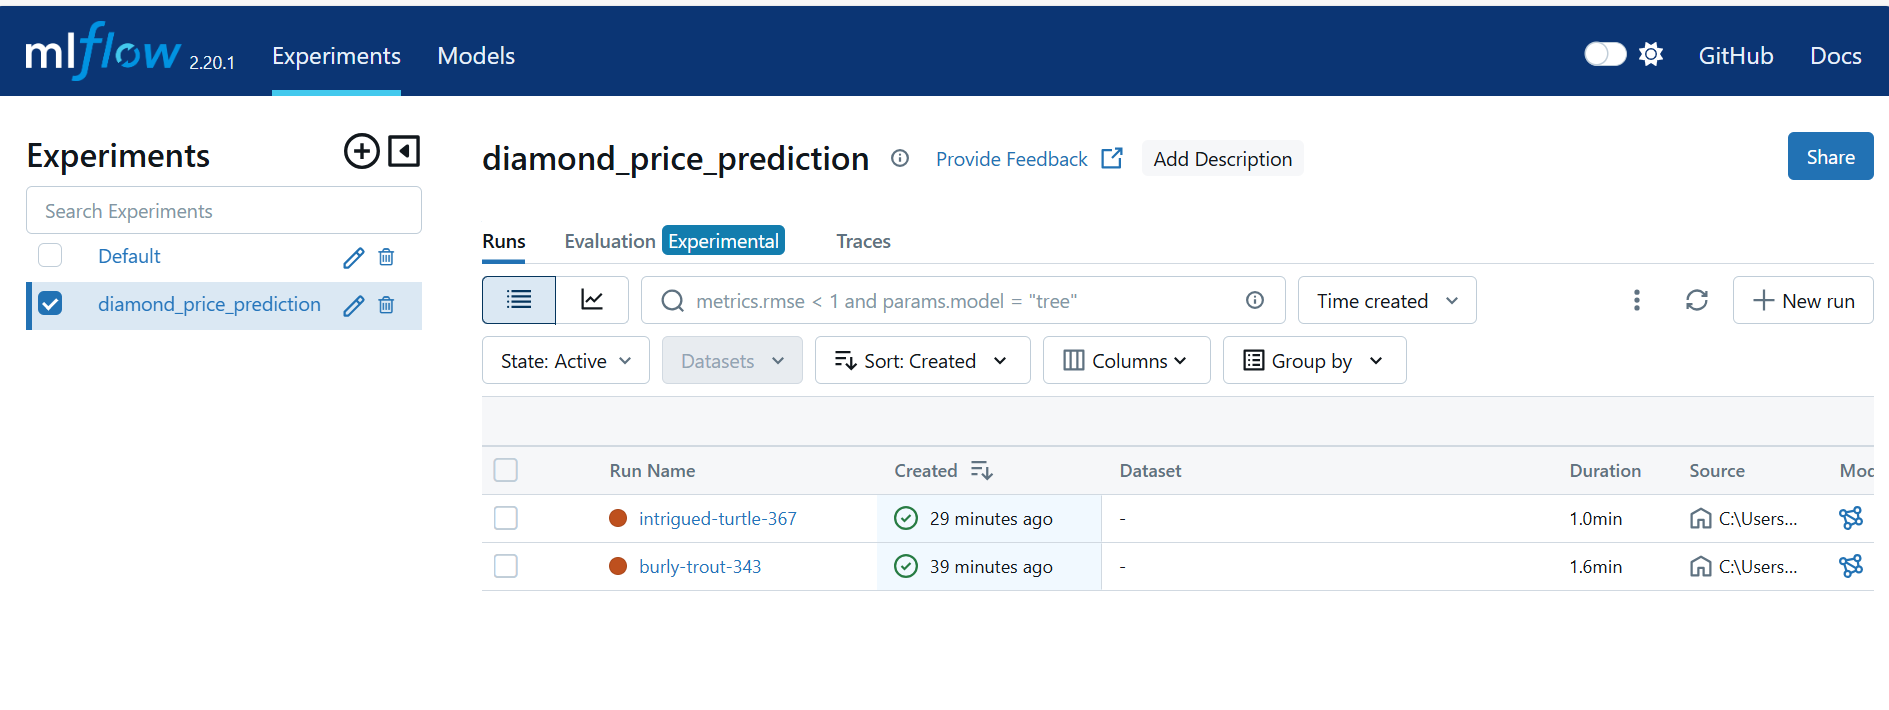